In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#three scaler values
a = 2.0
b = -3.0
c = 10.0

d = a*b + c
d

4.0

In [3]:
h = 0.0001


a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print("d1", d1)
print("d2", d2)
print("slop", (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slop -3.000000000010772


In [4]:
class Value:

    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*') 
        return out

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

In [5]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s |  data %.4f | grad % .4f }" %(n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

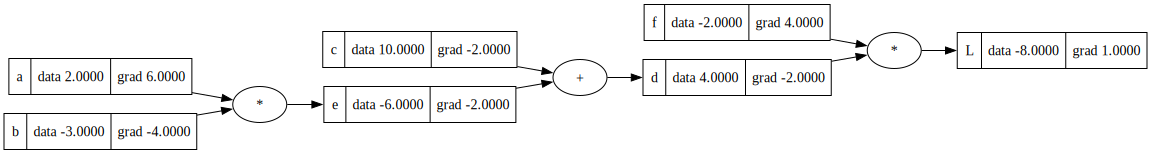

In [20]:
draw_dot(L)


Manual backpropagation:

In [17]:
def lol():


    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data + h

    print((L2 - L1)/h)


lol()

1.000000000000334


In [7]:
L.grad = 1.0

In [ ]:
# Calculate the derivatives of L with respect to d and f respectively.


L = d * f

dL /dd = f

##solution

(f(x+h) - f(x))/h

((d+h)*f - d*f)/h

(d*f + h*f - d*f)/h

(h*f)/h

f


dL / dd = f
dL / df = d


In [19]:
d.grad = -2.0
f.grad = 4.0

In [ ]:
# Check the derivatives are correct or not

def lol():


    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    # d.data+=h
    f = Value(-2.0 + h, label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2 - L1)/h)


lol()

3.9999999999995595


In [ ]:
# Calculate the derivatives of L with respect to c and e.
# To find the derivative of L with respect to c, first we need to find the dericative of d with respect to c.

d = c + e

dd / dc = 1.0

# Solution

(f(x+h) - f(x))/h

((c + h) + e - (c + e))/h

(c + h + e - c - e)/h

h/h

1

dd / dc = 1.0
dd / de = 1.0

In [ ]:
dd / dc = 1.0
dd / de = 1.0

# WANT

dL / dc 
dL / de

# KNOW 

dL / dd 
dd / dc 
dd / de

# SOLUTION

dL / dc = (dL / dd) * (dd / dc)
dL / dc = -2.0 * 1.0
dL / dc = -2.0

dL / de = (dL / dd) * (dd / de)
dL / de = -2.0 * 1.0
dL / de = -2.0

In [24]:
e.grad = -2.0
c.grad = -2.0

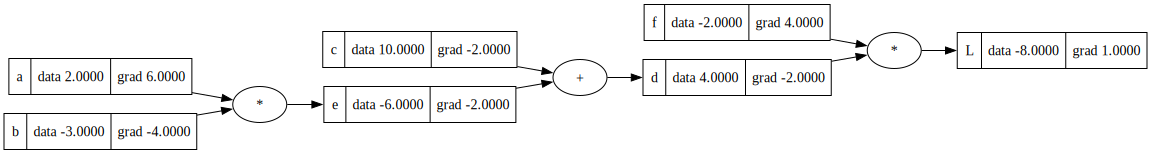

In [25]:
draw_dot(L)

In [28]:
# Check the derivatives are correct or not

def lol():


    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0 + h, label = 'c')
    e = a*b; e.label='e'
    # e.data+=h
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2 - L1)/h)


lol()

-1.9999999999988916


In [ ]:
# Calculate the dericatives of L with respect to a and b.
# To find the derivatives of L with respect to a and b, first we need to calculate the derivative of e with respect to a and b.

e = a * b


L = d * f

de /da = b

##solution

(f(x+h) - f(x))/h

((a+h)*b - a*b)/h

(a*b + h*b - d*b)/h

(h*b)/h

b

de / da = b
de / db = a


In [ ]:
de / da = b
de / db = a

# WANT

dL / da 
dL / db 

# KNOW


de / da = b
de / db = a


dL / da =  (dL / de) * (de / da)
dL / da = -2.0 * 2.0
dL / da = -4.0

dL / db = (dL / de) * (de / db)
dL / db = -2.0 * -3.0
dL / db = 6.0

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1155007898.py, line 1)

In [31]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

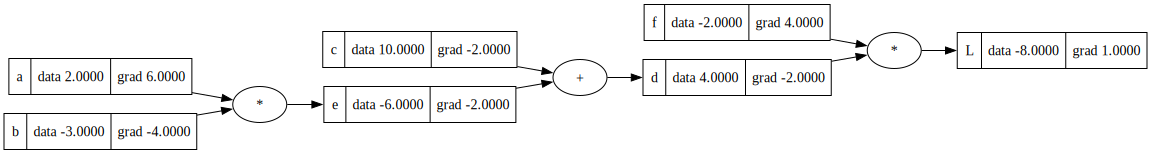

In [32]:
draw_dot(L)

In [34]:
# Check the derivatives are correct or not

def lol():


    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    a = Value(2.0, label = 'a')
    b = Value(-3.0 + h, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2 - L1)/h)


lol()

-3.9999999999995595


In [35]:
# Single Optimization Step

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
e.data += 0.01 * e.grad
f.data += 0.01 * f.grad


e = a * b
d = e + c
L = d * f

print(L.data)

-7.325695999999999
